In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

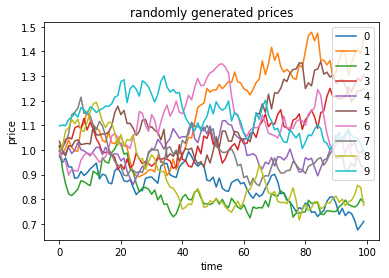

In [2]:
returns = pd.DataFrame(np.random.normal(1,0.03, (100,10)))
prices = returns.cumprod()
prices.plot()
plt.title('randomly generated prices')
plt.xlabel('time')
plt.ylabel('price')
plt.legend(loc=0)


In [3]:
s= pd.Series([1,2,np.nan, 4,5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [4]:
s.name='toy series'
print(s.name)

toy series


In [5]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


In [6]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq='D')
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [7]:
s.index = new_index
print(s.index)
s

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: toy series, dtype: float64

In [8]:
print(s.iloc[0])
print(s.iloc[-1])
print(s.iloc[:2])
print(s.iloc[::-1])
print(s.loc['2016-01-04'])

1.0
5.0
2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: toy series, dtype: float64
2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: toy series, dtype: float64
4.0


In [9]:
print(s <3)
print(s.loc[(s < 3) & (s > 1)])

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: toy series, dtype: bool
2016-01-02    2.0
Freq: D, Name: toy series, dtype: float64


In [10]:
!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr


In [11]:
prices = pdr.data.DataReader('CMG', 'yahoo', datetime(2018,1,1), datetime(2019,1,1))
prices = prices.iloc[:, 3]

In [12]:
print(prices.head(5))
print(prices.tail())

Date
2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-08    318.470001
Name: Close, dtype: float64
Date
2018-12-24    385.839996
2018-12-26    405.720001
2018-12-27    414.549988
2018-12-28    424.190002
2018-12-31    431.790009
Name: Close, dtype: float64


In [13]:
prices.name='CMG'
prices.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [14]:
print(type(prices))
monthly_prices = prices.resample('M')
monthly_prices.first().head()

<class 'pandas.core.series.Series'>


Date
2018-01-31    292.950012
2018-02-28    314.720001
2018-03-31    313.260010
2018-04-30    311.160004
2018-05-31    426.010010
Freq: M, Name: CMG, dtype: float64

In [15]:
dir(monthly_prices)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_adjust_binner_for_upsample',
 '_agg_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_loffset',
 '_apply_whitelist',
 '_assure_grouper',
 '_attributes',
 '_builtin_table',
 '_concat_objects',
 '_constructor',
 '_convert_obj',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_downsample',
 '_from_selection',
 '_get_binner',
 '_get_binner_for_time',
 '_get_index',
 '_get_indices',
 '_get_resampler_for_g

In [16]:
calendar_dates = pd.date_range(datetime(2018,1,1), datetime(2019,1,1), freq='D')
print(calendar_dates)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')


In [17]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
print(calendar_prices.head(15))

2018-01-01           NaN
2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-06    313.790009
2018-01-07    313.790009
2018-01-08    318.470001
2018-01-09    319.369995
2018-01-10    321.799988
2018-01-11    325.500000
2018-01-12    327.339996
2018-01-13    327.339996
2018-01-14    327.339996
2018-01-15    327.339996
Freq: D, Name: CMG, dtype: float64


In [18]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(15)

2018-01-01    413.530849
2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-06    313.790009
2018-01-07    313.790009
2018-01-08    318.470001
2018-01-09    319.369995
2018-01-10    321.799988
2018-01-11    325.500000
2018-01-12    327.339996
2018-01-13    327.339996
2018-01-14    327.339996
2018-01-15    327.339996
Freq: D, Name: CMG, dtype: float64

In [19]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(15)

2018-01-01    292.950012
2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-06    313.790009
2018-01-07    313.790009
2018-01-08    318.470001
2018-01-09    319.369995
2018-01-10    321.799988
2018-01-11    325.500000
2018-01-12    327.339996
2018-01-13    327.339996
2018-01-14    327.339996
2018-01-15    327.339996
Freq: D, Name: CMG, dtype: float64

In [20]:
dropped_prices=calendar_prices.dropna()
dropped_prices.head(15)

2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-06    313.790009
2018-01-07    313.790009
2018-01-08    318.470001
2018-01-09    319.369995
2018-01-10    321.799988
2018-01-11    325.500000
2018-01-12    327.339996
2018-01-13    327.339996
2018-01-14    327.339996
2018-01-15    327.339996
2018-01-16    327.369995
Freq: D, Name: CMG, dtype: float64

Text(0.5, 0, 'date')

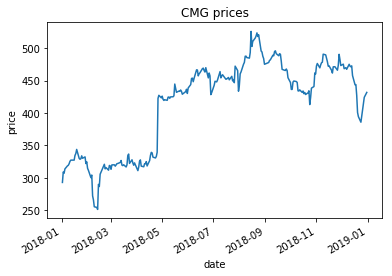

In [21]:
prices.plot()
plt.title('CMG prices')
plt.ylabel('price')
plt.xlabel('date')

In [22]:
prices.describe()

count    251.000000
mean     413.583067
std       69.545918
min      251.330002
25%      329.764999
50%      436.440002
75%      467.669998
max      525.890015
Name: CMG, dtype: float64

In [23]:
modified_prices = prices * 2-10
modified_prices.tail()

Date
2018-12-24    761.679993
2018-12-26    801.440002
2018-12-27    819.099976
2018-12-28    838.380005
2018-12-31    853.580017
Name: CMG, dtype: float64

In [24]:
noisy_prices=prices + 5 * pd.Series(np.random.normal(0,5, len(prices)), index = prices.index) +20
noisy_prices.head(15)

Date
2018-01-02    326.128233
2018-01-03    347.049204
2018-01-04    305.627894
2018-01-05    323.576804
2018-01-08    355.078777
2018-01-09    343.886828
2018-01-10    320.872263
2018-01-11    349.966195
2018-01-12    347.595261
2018-01-16    361.369793
2018-01-17    357.262021
2018-01-18    351.124979
2018-01-19    355.510512
2018-01-22    323.435295
2018-01-23    351.704611
dtype: float64

Date
2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-08    318.470001
Name: CMG, dtype: float64
Date
2018-01-02          NaN
2018-01-03    16.049988
2018-01-04    -1.890015
2018-01-05     6.680023
2018-01-08     4.679993
Name: CMG, dtype: float64
Date
2018-01-02         NaN
2018-01-03    0.054787
2018-01-04   -0.006117
2018-01-05    0.021751
2018-01-08    0.014914
Name: CMG, dtype: float64


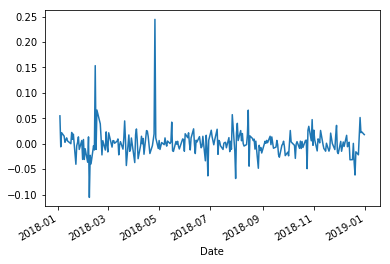

In [25]:
print(prices.head())
add_returns = prices.diff()
print(add_returns.head())
mult_returns = prices.pct_change()
print(mult_returns.head())
mult_returns.plot()

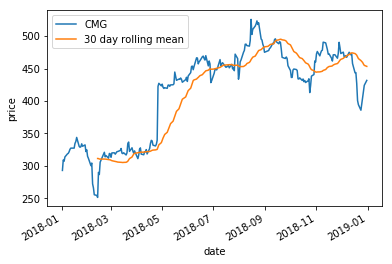

In [26]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name='30 day rolling mean'

prices.plot()
rolling_mean.plot()
plt.xlabel('date')
plt.ylabel('price')
plt.legend()

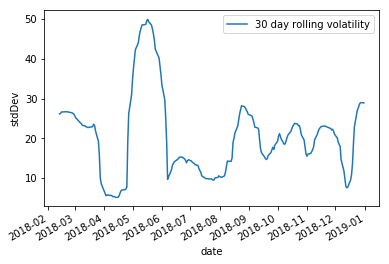

In [27]:
rolling_std = prices.rolling(30).std()
rolling_std.name='30 day rolling volatility'

rolling_std.plot()
plt.xlabel('date')
plt.ylabel('stdDev')
plt.legend()

In [28]:
print(mult_returns.median())

0.0016593617106530623


In [32]:
dict_data = {
    'a': [1,2,3,4,5],
    'b': ['L', 'K', 'J', 'M', 'Z'],
    'c': np.random.normal(0, 1, 5)
}
print(dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-0.3871184 , -1.62182194,  1.01355719,  0.05013448, -0.86823457])}


In [33]:
frame_data = pd.DataFrame(dict_data, pd.date_range('2016-01-01', freq='D', periods=5))
print(frame_data)

            a  b         c
2016-01-01  1  L -0.387118
2016-01-02  2  K -1.621822
2016-01-03  3  J  1.013557
2016-01-04  4  M  0.050134
2016-01-05  5  Z -0.868235


In [37]:
s_1 =pd.Series([2,4,6,8,10], name='Evens')
s_2 = pd.Series([1,3,5,7,9], name='odds')
numbers = pd.concat([s_1, s_2],axis=1)
print(numbers)

   Evens  odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


In [38]:
print(numbers.columns)

Index(['Evens', 'odds'], dtype='object')


In [39]:
numbers.columns = ['abc','def']
numbers

,abc,def
0,2,1
1,4,3
2,6,5
3,8,7
4,10,9


In [40]:
print(numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [41]:
numbers.index = pd.date_range('2016-01-01',periods=5)

In [42]:
numbers

,abc,def
2016-01-01,2,1
2016-01-02,4,3
2016-01-03,6,5
2016-01-04,8,7
2016-01-05,10,9


In [45]:
print(numbers.values)
type(numbers.values)

[[ 2  1]
 [ 4  3]
 [ 6  5]
 [ 8  7]
 [10  9]]


numpy.ndarray

In [48]:
CMG = pdr.data.DataReader('CMG', data_source='yahoo', start=datetime(2018,1,1), end=datetime(2019,1,1))
MCD = pdr.data.DataReader('MCD', data_source='yahoo', start=datetime(2018,1,1), end=datetime(2019,1,1))
SHAK = pdr.data.DataReader('SHAK', data_source='yahoo', start=datetime(2018,1,1), end=datetime(2019,1,1))

In [85]:
prices = pd.concat([CMG.iloc[:,-1], MCD.iloc[:,-1],SHAK.iloc[:,-1]], axis=1)
prices.columns = ['CMG', 'MCD','SHAK']
prices.head()

,CMG,MCD,SHAK
Date,,,
2018-01-02,292.950012,167.872742,43.680000
2018-01-03,309.000000,167.165268,47.080002
2018-01-04,307.109985,168.337921,45.389999
2018-01-05,313.790009,168.677139,44.169998
2018-01-08,318.470001,168.560822,43.520000


In [86]:
prices.CMG.head()


Date
2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-08    318.470001
Name: CMG, dtype: float64

In [87]:
prices.loc[:,['MCD','CMG']].head()

,MCD,CMG
Date,,
2018-01-02,167.872742,292.950012
2018-01-03,167.165268,309.000000
2018-01-04,168.337921,307.109985
2018-01-05,168.677139,313.790009
2018-01-08,168.560822,318.470001


In [88]:
prices.loc['2018-05-05':'2018-06-06'].head()

,CMG,MCD,SHAK
Date,,,
2018-05-07,419.619995,160.918106,57.099998
2018-05-08,424.420013,160.693802,59.360001
2018-05-09,424.690002,160.176910,58.299999
2018-05-10,422.670013,160.986389,58.369999
2018-05-11,424.899994,161.298462,58.680000


In [89]:
prices.loc[(prices.MCD < prices.CMG) & ~prices.SHAK.isnull()].head()


,CMG,MCD,SHAK
Date,,,
2018-01-02,292.950012,167.872742,43.680000
2018-01-03,309.000000,167.165268,47.080002
2018-01-04,307.109985,168.337921,45.389999
2018-01-05,313.790009,168.677139,44.169998
2018-01-08,318.470001,168.560822,43.520000


In [90]:
TSLA =  pdr.data.DataReader('TSLA', data_source='yahoo', start=datetime(2018,1,1), end=datetime(2019,1,1)).iloc[:, -1]
prices.loc[:,'TSLA'] = TSLA
prices.head()

,CMG,MCD,SHAK,TSLA
Date,,,,
2018-01-02,292.950012,167.872742,43.680000,320.529999
2018-01-03,309.000000,167.165268,47.080002,317.250000
2018-01-04,307.109985,168.337921,45.389999,314.619995
2018-01-05,313.790009,168.677139,44.169998,316.579987
2018-01-08,318.470001,168.560822,43.520000,336.410004


In [92]:
prices = prices.drop('TSLA', axis=1)

KeyError: "['TSLA'] not found in axis"

In [93]:
prices.head()

,CMG,MCD,SHAK
Date,,,
2018-01-02,292.950012,167.872742,43.680000
2018-01-03,309.000000,167.165268,47.080002
2018-01-04,307.109985,168.337921,45.389999
2018-01-05,313.790009,168.677139,44.169998
2018-01-08,318.470001,168.560822,43.520000


Text(0.5, 1.0, 'stock prices')

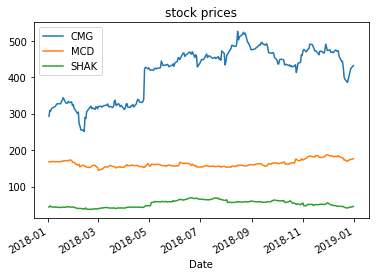

In [94]:
prices.plot()
plt.title('stock prices')

In [98]:
prices.mean(axis=0)

CMG     413.583067
MCD     162.842614
SHAK     52.420159
dtype: float64

In [100]:
prices.describe()

,CMG,MCD,SHAK
count,251.000000,251.000000,251.000000
mean,413.583067,162.842614,52.420159
std,69.545918,9.461556,9.143926
min,251.330002,144.601990,37.290001
25%,329.764999,155.835876,43.500000
50%,436.440002,159.396698,52.490002
75%,467.669998,168.095634,58.930000
max,525.890015,187.317413,69.220001


In [101]:
(2*prices-50).head()

,CMG,MCD,SHAK
Date,,,
2018-01-02,535.900024,285.745483,37.360001
2018-01-03,568.000000,284.330536,44.160004
2018-01-04,564.219971,286.675842,40.779999
2018-01-05,577.580017,287.354279,38.339996
2018-01-08,586.940002,287.121643,37.040001


In [109]:
mult_returns = prices.pct_change()[1:]
print(mult_returns.head())

                 CMG       MCD      SHAK
Date                                    
2018-01-03  0.054787 -0.004214  0.077839
2018-01-04 -0.006117  0.007015 -0.035896
2018-01-05  0.021751  0.002015 -0.026878
2018-01-08  0.014914 -0.000690 -0.014716
2018-01-09  0.002826 -0.002242 -0.002298


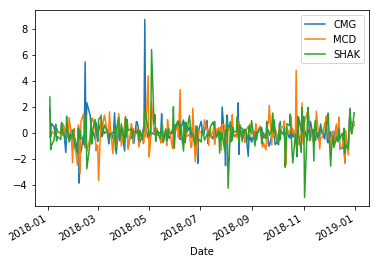

In [110]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.plot()

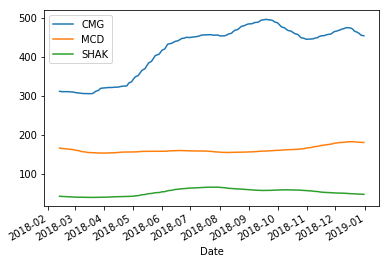

In [113]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.columns = prices.columns
rolling_mean.plot()
plt.legend()